# Courts and Rinks
### Robby Gold

With our topic being the best neighborhood to live in from a child's perspective, I created a metric to rank the towns based on the sporting facilities present in each area. I used dataset titled "Codes and Rinks in Pittsburgh" This dataset gives the user every court or rink in Pittsburgh, with a lot of other information about police and fire zoning as well as other basic location information, such as longitude and latitude or the council district that the park is in. Below is the first ten values of the raw dataset as it is given.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

%matplotlib inline

In [2]:
chip = pd.read_csv('Courts-and-Rinks.csv', sep=',')
chip.head(10)

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
5,299909706,Alton Park Basketball Court 2,Basketball (Full),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414155,-80.022088
6,912994212,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449331,-79.977473
7,1342647628,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449184,-79.977371
8,470473315,Arlington Park Basketball Court 1,Basketball (Full),Arlington Park,NaN,Asphalt,0,f,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.417990,-79.975053
9,229834077,Armstrong Park Basketball Court 1,Basketball (Full),Armstrong Park,NaN,Asphalt,0,f,South Side Flats,3,17,42003170200,3,17,3,4-24,40.427925,-79.986011


This dataset has a lot of columns, and I have no use for most of them. This code eliminates every column that I have no use for.

In [3]:
chip = chip.drop(['id', 'location', 'surface_material', 'grandstand', 'inactive', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 
                  'fire_zone'], axis=1)
chip.head(10)

,name,type,park,neighborhood,latitude,longitude
0,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,Allegheny Center,40.454443,-80.008104
1,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,Allegheny Center,40.452400,-80.012531
2,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,Allegheny Center,40.452238,-80.012150
3,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,Allegheny Center,40.452075,-80.011767
4,Alton Park Basketball Court 1,Basketball (Half),Alton Park,Beechview,40.414152,-80.022305
5,Alton Park Basketball Court 2,Basketball (Full),Alton Park,Beechview,40.414155,-80.022088
6,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,Bedford Dwellings,40.449331,-79.977473
7,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,Bedford Dwellings,40.449184,-79.977371
8,Arlington Park Basketball Court 1,Basketball (Full),Arlington Park,South Side Slopes,40.417990,-79.975053
9,Armstrong Park Basketball Court 1,Basketball (Full),Armstrong Park,South Side Flats,40.427925,-79.986011


I then created a metric using if statements to loop through the dataframe row by row, and calculate a value based on the types of parks present in each neighborhood. I stored these values by neighborhood in a dictionary.
As seen below, the scoring is as follows:

Each Basketball (Full) is 5 points.
Basketball (Half) and Volleyball are worth 3 points each.
Tennis is worth 2 points each.
General Sports, Street Hocket, Dek Hockey, Hockey, Pickleball, Bocce, and Horseshoe Pit are all worth 1 point each.

In [4]:
grade = {}
curr = 0
for row in chip.iterrows():
    if (chip.iat[curr , 1] == 'Basketball (Full)'):
        try:
            grade[chip.iat[curr, 3]] = grade[chip.iat[curr, 3]] + 5
        except:
            grade[chip.iat[curr, 3]] = 5
    elif (chip.iat[curr , 1] == 'Basketball (Half)' or 'Volleyball'):
        try:
            grade[chip.iat[curr, 3]] = grade[chip.iat[curr, 3]] + 3
        except:
            grade[chip.iat[curr, 3]] = 3
    elif (chip.iat[curr , 1] == 'Tennis'):
        try:
            grade[chip.iat[curr, 3]] = grade[chip.iat[curr, 3]] + 2
        except:
            grade[chip.iat[curr, 3]] = 2
    elif (chip.iat[curr , 1] == 'General Sports' or 'Street Hockey' or 'Dek Hockey' or 'Hockey' or 'Pickleball' or 'Bocce'
       or 'Horseshoe Pit'):
        try:
            grade[chip.iat[curr, 3]] = grade[chip.iat[curr, 3]] + 1
        except:
            grade[chip.iat[curr, 3]] = 1
    curr = curr + 1
grade

{'Allegheny Center': 29,
 'Beechview': 29,
 'Bedford Dwellings': 10,
 'South Side Slopes': 26,
 'South Side Flats': 19,
 'Lower Lawrenceville': 20,
 'Crawford-Roberts': 8,
 'Banksville': 11,
 'Bon Air': 3,
 'Central Oakland': 3,
 'Brighton Heights': 8,
 'Brookline': 31,
 'Hazelwood': 40,
 'Lincoln-Lemington-Belmar': 10,
 'Troy Hill': 28,
 'Perry South': 3,
 'Homewood West': 5,
 'Squirrel Hill South': 84,
 'Strip District': 3,
 'Stanton Heights': 6,
 'Crafton Heights': 13,
 'Upper Lawrenceville': 8,
 'East Carnegie': 8,
 'East Hills': 10,
 'Duquesne Heights': 6,
 'Allentown': 5,
 'Mount Washington': 19,
 'East Liberty': 24,
 'Fairywood': 10,
 'Fineview': 6,
 'Garfield': 13,
 'Greenfield': 21,
 'South Oakland': 8,
 'Point Breeze': 6,
 'Regent Square': 18,
 'Hays': 3,
 'Elliott': 19,
 'Morningside': 14,
 'Highland Park': 60,
 'Central Northside': 10,
 'Terrace Village': 23,
 'Larimer': 5,
 'Spring Hill-City View': 16,
 'Carrick': 13,
 'Central Lawrenceville': 5,
 'Manchester': 24,
 'Marsh

Obviously, the data above that is in the dictionary is very difficult to work with at face value and worst of all, it can't be sorted easily. In the code below, I create a new dataframe using the dictionary and then sort the dataframe based on the score. I then use that sorted dataframe to create my chart which makes for a much better viewing experience.

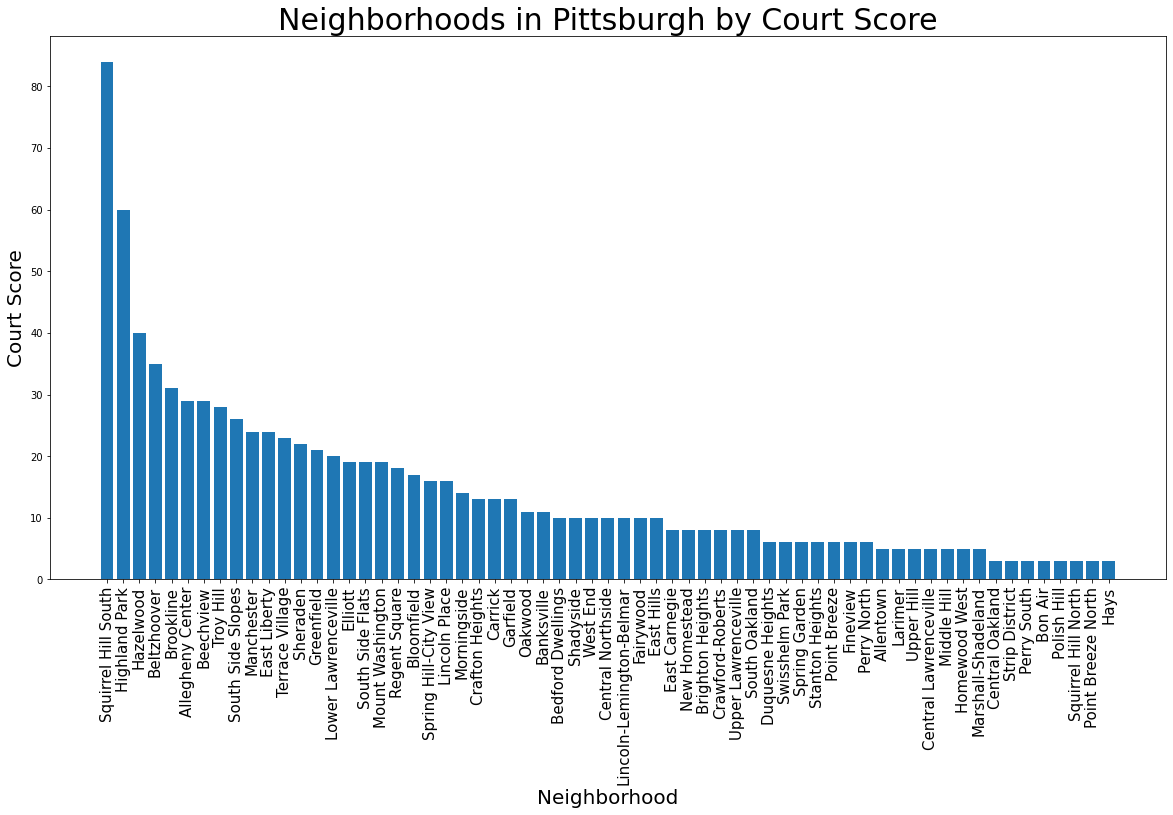

In [5]:
df = pd.DataFrame(list(grade.items()), columns = ['Neighborhood', 'Court Score'])
plt.figure(figsize = (20,10))
plt.bar('Neighborhood', 'Court Score', data=df.sort_values(by='Court Score', ascending=False))
plt.xlabel("Neighborhood", fontsize='20')
plt.ylabel("Court Score", fontsize='20')
plt.title("Neighborhoods in Pittsburgh by Court Score", fontsize='30')
plt.xticks(rotation = 90, fontsize='15')
plt.show()

This bar chart is a much better visualization, but because of the nature of this assignment, we really don't need to pay attention to the lower valued items. Below, I recreate the same bar chart, but I use the head command to only show the top 5 values.

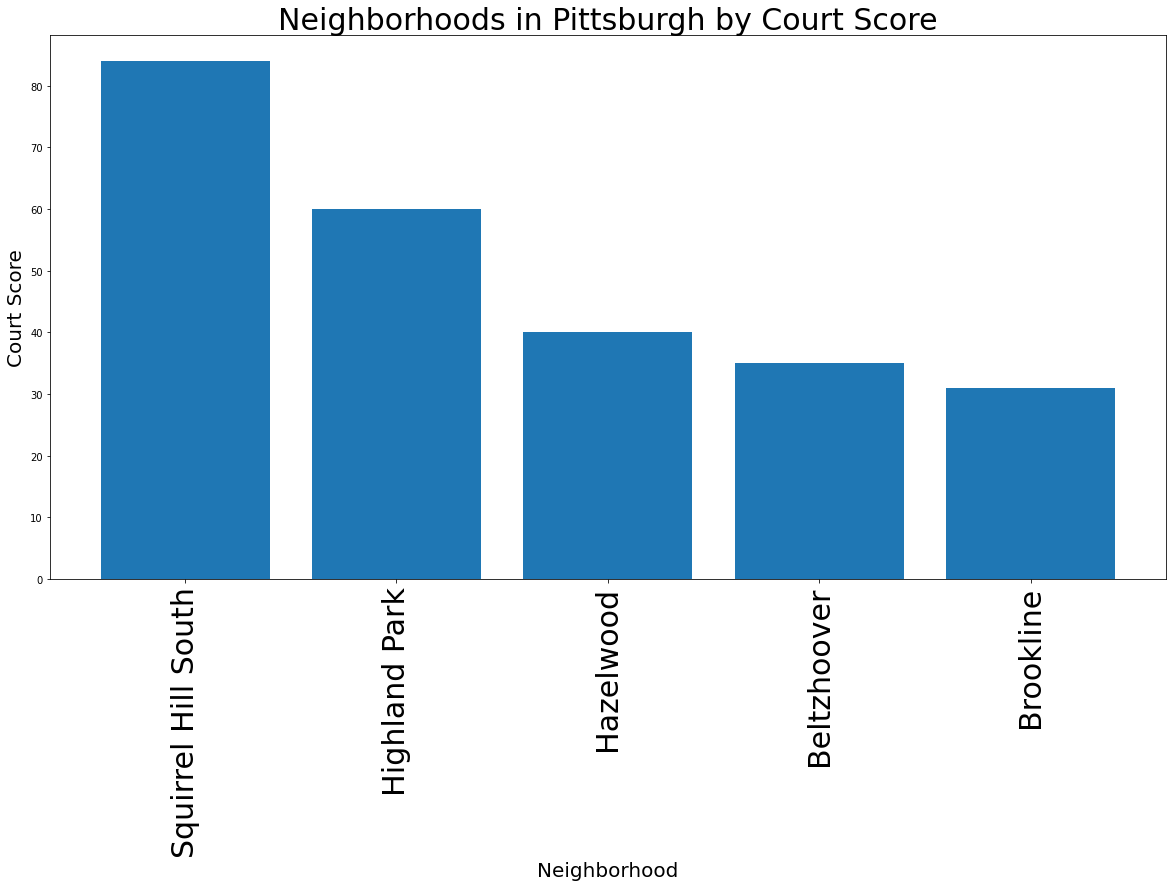

In [6]:
df = pd.DataFrame(list(grade.items()), columns = ['Neighborhood', 'Court Score'])
plt.figure(figsize = (20,10))
plt.bar('Neighborhood', 'Court Score', data=df.sort_values(by='Court Score', ascending=False).head(5))
plt.xlabel("Neighborhood", fontsize='20')
plt.ylabel("Court Score", fontsize='20')
plt.title("Neighborhoods in Pittsburgh by Court Score", fontsize='30')
plt.xticks(rotation = 90, fontsize='30')
plt.show()

### Heat Map

I also decided to create a heat map to really show the disparity in the lead more easily. It is for this reason that I kept the latitude and longitude values in my initial dataset, as it made it super easy to create this map.

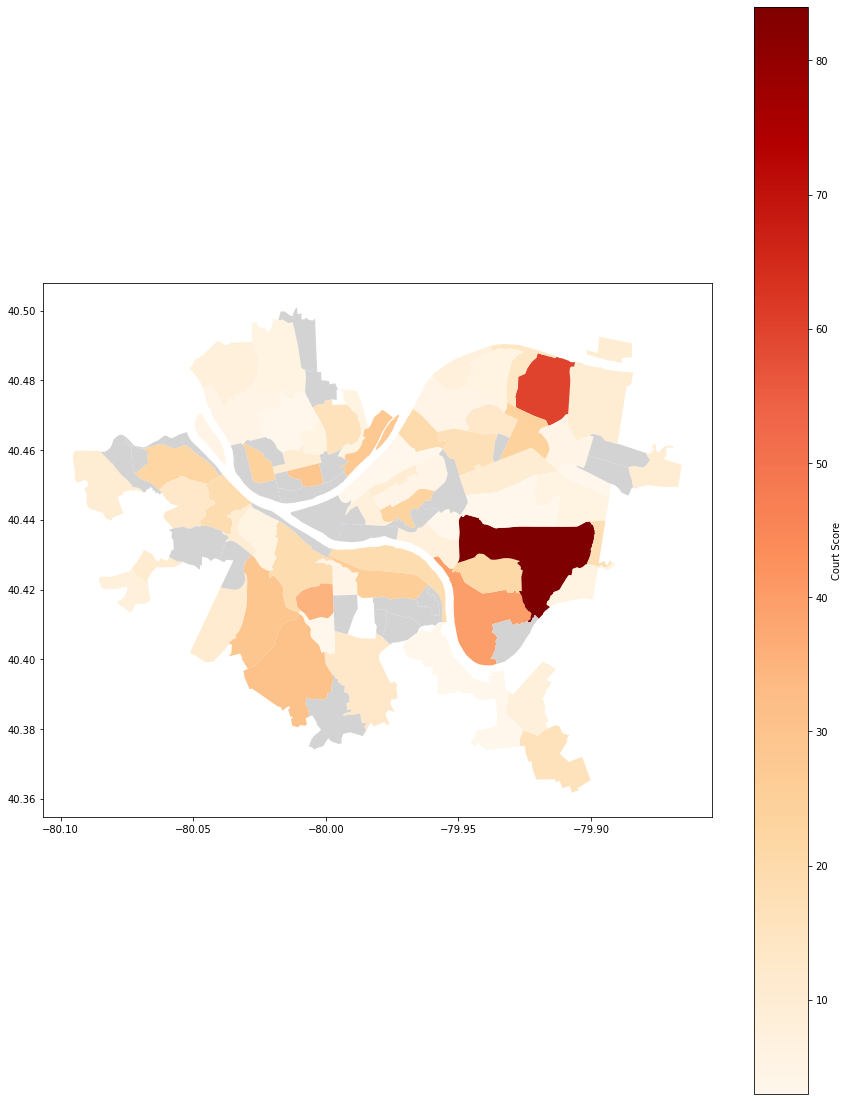

In [8]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
grade_map = neighborhoods.merge(df, how='left', left_on='hood', right_on='Neighborhood')
grade_map.plot(
    column='Court Score',
    cmap='OrRd',
    legend=True,
    figsize=(15,20),
    legend_kwds={'label': "Court Score"},
    missing_kwds={"color": "lightgrey"}
    )

As one can see, the neighborhood with the highest Court Score was by far Squirrel Hill South. As we saw in the bar chart, only one other neighborhood has even half the score of Squirrel Hill South, and that is Highland Park. Considering the fact that both Schenley and Frick park are in this neighborhood, it makes sense that this area blows away the competition easily as it is very common for parks to feature sports facilities.

## Conclusion

Therefore, in the eyes of a child rated by Court Score, Squirrel Hill South is by far the best area to live in Pittsburgh.